<a href="https://colab.research.google.com/github/KhasanovCG/AI_Midterm_/blob/main/aiiii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emnist


In [2]:
# Install necessary libraries
!pip install emnist
!pip install tensorflow

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from emnist import extract_training_samples, extract_test_samples
from sklearn.model_selection import train_test_split

# Load the EMNIST dataset
(train_images, train_labels), (test_images, test_labels) = extract_training_samples('letters'), extract_test_samples('letters')

# Preprocess the data
train_images = train_images.reshape((len(train_images), 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((len(test_images), 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical data
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))  # 27 classes for letters

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels)
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('handwritten_character_recognition_model_emnist.h5')


Epoch 1/10
3120/3120 [==============================] - 67s 21ms/step - loss: 0.5428 - accuracy: 0.8332 - val_loss: 0.3449 - val_accuracy: 0.8865
Epoch 2/10
3120/3120 [==============================] - 66s 21ms/step - loss: 0.2750 - accuracy: 0.9098 - val_loss: 0.2775 - val_accuracy: 0.9097
Epoch 3/10
3120/3120 [==============================] - 64s 20ms/step - loss: 0.2209 - accuracy: 0.9252 - val_loss: 0.2706 - val_accuracy: 0.9130
Epoch 4/10
3120/3120 [==============================] - 65s 21ms/step - loss: 0.1842 - accuracy: 0.9367 - val_loss: 0.2603 - val_accuracy: 0.9167
Epoch 5/10
3120/3120 [==============================] - 64s 21ms/step - loss: 0.1563 - accuracy: 0.9445 - val_loss: 0.2553 - val_accuracy: 0.9219
Epoch 6/10
3120/3120 [==============================] - 65s 21ms/step - loss: 0.1324 - accuracy: 0.9517 - val_loss: 0.2884 - val_accuracy: 0.9136
Epoch 7/10
3120/3120 [==============================] - 65s 21ms/step - loss: 0.1149 - accuracy: 0.9568 - val_loss: 0.2742 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 105ms/step


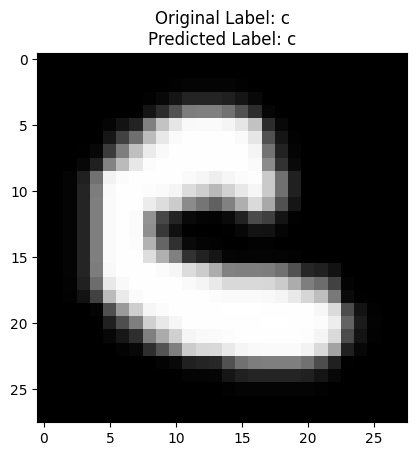

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from emnist import extract_training_samples

# Load the trained model
model = load_model('handwritten_character_recognition_model_emnist.h5')

# Load the EMNIST dataset
images, labels = extract_training_samples('letters')
test_images = images[:5000]  # Use a subset for testing to avoid memory issues
test_labels = labels[:5000]

# Select a random index
random_index = np.random.randint(0, len(test_images))

# Select the image and its label
image = test_images[random_index]
label = test_labels[random_index]

# Preprocess the image
image = image.reshape((1, 28, 28, 1)).astype('float32') / 255

# Make a prediction
predictions = model.predict(image)

# Get the predicted label
predicted_label = np.argmax(predictions)

# Display the original image and the predicted label
plt.imshow(image.reshape((28, 28)), cmap='gray')
plt.title(f'Original Label: {chr(label + 96)}\nPredicted Label: {chr(predicted_label + 96)}')
plt.show()




In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import interactive, widgets
from IPython.display import display
from tensorflow.keras.models import load_model
from emnist import extract_training_samples

# Load the trained model
model = load_model('handwritten_character_recognition_model_emnist.h5')

# Load a subset of the EMNIST dataset for testing
images, _ = extract_training_samples('letters')
test_images = images[:5000]  # Use a subset for testing to avoid memory issues

# Create an interactive canvas
canvas = widgets.Image(format='png', width=200, height=200)

# Initialize canvas with a blank image
blank_image = np.zeros((28, 28))
image_pil = Image.fromarray((blank_image * 255).astype(np.uint8))
canvas.value = bytes(image_pil.getbuffer())

def predict_image(canvas_data):
    # Convert canvas data to a grayscale image
    image = np.array(canvas_data).reshape((1, 28, 28, 1)).astype('float32') / 255

    # Make a prediction
    predictions = model.predict(image)

    # Get the predicted label
    predicted_label = np.argmax(predictions)

    # Display the original image and the predicted label
    plt.imshow(image.reshape((28, 28)), cmap='gray')
    plt.title(f'Predicted Label: {chr(predicted_label + 96)}')
    plt.axis('off')
    plt.show()

# Create an interactive widget
interactive_widget = interactive(predict_image, canvas_data=canvas)

# Display the canvas and interactive widget
display(canvas, interactive_widget)




AttributeError: ignored